In [262]:
import warnings
warnings.filterwarnings('ignore')

In [263]:
from sklearn.preprocessing import StandardScaler#표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler#정규화
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from IPython.display import Image
fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumSquareRoundEB.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)



In [264]:
df = pd.read_csv('../csv-data/basketball_stat.csv')

In [265]:
df

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


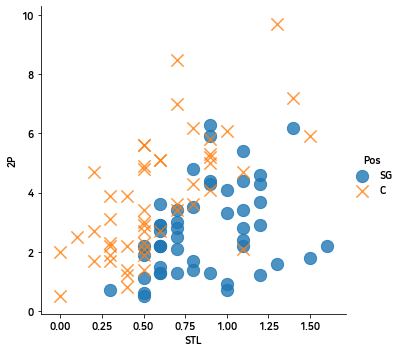

In [266]:
sns.lmplot(x='STL', y='2P',data=df, fit_reg=False, scatter_kws={'s':150}, markers=['o','x'], hue='Pos')

In [267]:
df.drop(['2P','AST','STL'], axis=1, inplace=True)

In [268]:
#train , test split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,2:], df.iloc[:,1], test_size=0.2, random_state=3)

#포지션이 target. 

### 모델 선정=>cross-valication
KNN, SVM, DECISIONTREE 중 교차 검증으로 ... 


In [269]:
df_clf = DecisionTreeClassifier(random_state=11)
knn_clf = KNeighborsClassifier()
svc_clf = SVC()
how = [df_clf, knn_clf, svc_clf]

In [270]:
def print_metrics(model, x, y,m=10):
    
    scores = cross_val_score(model, x,y, cv=m)
    acc_mean = np.mean(scores)
    print("교차검증결과: {}".format(scores))
    print("교차검증결과: {:.2f}".format(np.mean(scores)))
    
    return scores, acc_mean
    

In [271]:
model_names=[]
result=[]
result_mean=[]
for i in how:
    a=str(i)
    gg=print_metrics(i, X_train, y_train, 5)
    print("-------------------------------------"+a[: a.find("(")]+"---------------------------------")
    model_names.append(a[: a.find("(")])
    result.append(gg[0])
    result_mean.append(gg[1])
    
print(result)
print(result_mean)
print(model_names)

교차검증결과: [0.9375 0.875  0.9375 0.9375 0.75  ]
교차검증결과: 0.89
-------------------------------------DecisionTreeClassifier---------------------------------
교차검증결과: [0.875  0.875  0.9375 0.875  0.875 ]
교차검증결과: 0.89
-------------------------------------KNeighborsClassifier---------------------------------
교차검증결과: [1.     0.875  0.875  0.9375 0.9375]
교차검증결과: 0.93
-------------------------------------SVC---------------------------------
[array([0.9375, 0.875 , 0.9375, 0.9375, 0.75  ]), array([0.875 , 0.875 , 0.9375, 0.875 , 0.875 ]), array([1.    , 0.875 , 0.875 , 0.9375, 0.9375])]
[0.8875, 0.8875, 0.925]
['DecisionTreeClassifier', 'KNeighborsClassifier', 'SVC']


([array([1., 0., 0., 0., 0., 1., 0., 3., 0., 0.]),
  array([0., 0., 0., 0., 0., 4., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 2., 0., 2., 0., 1.])],
 array([0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875, 0.9  , 0.925, 0.95 ,
        0.975, 1.   ]),
 <a list of 3 Lists of Patches objects>)

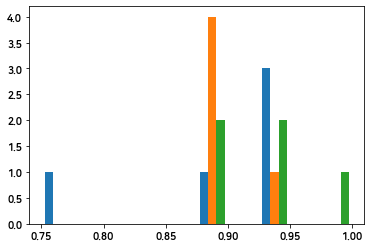

In [272]:
plt.hist(result)

In [273]:
svc_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### 하이퍼 파라메터=>grid search

<img src="https://raw.githubusercontent.com/Yusubin/jupyter/master/data08/011.png">

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [274]:
def grid_search(model, params, k=5):
    gs= GridSearchCV(model, params, cv=k)
    gs.fit(X_train, y_train)
    print(gs)
    print("Best Parameters : ", gs.best_params_)
    print("Best Score : ", gs.best_score_)
    print("Best Test Score : ", gs.score(X_test, y_test))
    return gs

In [275]:
grid_params={
    "criterion":["gini", "entropy"], "max_depth":[3,5,7,9], "random_state": [1,3,5]
}

In [276]:
grid_search(df_clf, grid_params, k=5)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=11,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9], 'random_state': [1, 3, 5]},

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=11,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9], 'random_state': [1, 3, 5]},

In [277]:
best_model=DecisionTreeClassifier(criterion= 'entropy', max_depth= 3, random_state= 3)
best_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=3, splitter='best')

In [278]:
best_model.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=3, splitter='best')

In [279]:
#정확도 체크, acc, recall, precision, f1-score  ===> confusionMatrix

In [280]:
pred=None
def print_test_metrics(model, X_test):
    global pred
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print('*** Test Accuracy *** \n   {}'.format(model.score(X_test, y_test)))
    print('\n*** Confusion Matrix *** \n', confusion_matrix(y_test, model.predict(X_test)))
    print('*** Confusion Matrix(precision) ***')
    print(precision_score(y_test, pred, average='macro'))
    print('***classification re(precision) ***')
    print(classification_report(y_test, pred))
    
   

In [281]:
print_test_metrics(best_model, X_test)

*** Test Accuracy *** 
   0.95

*** Confusion Matrix *** 
 [[10  0]
 [ 1  9]]
*** Confusion Matrix(precision) ***
0.9545454545454546
***classification re(precision) ***
              precision    recall  f1-score   support

           C       0.91      1.00      0.95        10
          SG       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [282]:
# 실제(c)--> 예측(c, sg),   실제(sg)--> 예측(c, sg),   
# 4가지 경우를 표형태로 정리 해주는 것이 confushion_matrix
#binary classfication인경우 보기 괜찮은데 ... multi classfication 인경우 불편하다.
## --- >classification_report 사용

## recall
#### 실제 C중에서, 예측한 값들을 보면 실제 C로 100% 정확하게 예측해냈고, SG로 예측한 것은 없다.
####  실제 SG중에서, 예측한 값들을 보면 실제 SG로 예측한 것이 90%이고, C로 예측한 것이 10%이다.

## precision
####  예측한 C중에서 실제 91%가 C였고, SG는 9%이다.
####  예측한 SG중에서 실제 100%가 SG였고, C는 없었다.

In [283]:
type(y_test)
pred

array(['C', 'SG', 'SG', 'SG', 'C', 'C', 'C', 'SG', 'C', 'C', 'C', 'C',
       'C', 'SG', 'SG', 'C', 'SG', 'C', 'SG', 'SG'], dtype=object)

In [284]:
result_df = pd.DataFrame({
    'predict_result' : pred,
    'y_test' : y_test
})
result_df

,predict_result,y_test
93,C,C
67,SG,SG
6,SG,SG
64,SG,SG
96,C,SG
83,C,C
98,C,C
42,SG,SG
25,C,C
15,C,C


In [285]:
encoder = LabelEncoder()
col = result_df.columns
col
for c in col:
    result_df[c] = encoder.fit_transform(result_df[c])
result_df

,predict_result,y_test
93,0,0
67,1,1
6,1,1
64,1,1
96,0,1
83,0,0
98,0,0
42,1,1
25,0,0
15,0,0


In [286]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
y_pred_proba

array([0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 1.])

In [287]:
for_roc_df = pd.DataFrame({
    'y_test' : y_test,
    'y_pred_proba' : y_pred_proba
})
for_roc_df

,y_test,y_pred_proba
93,C,0.0
67,SG,1.0
6,SG,1.0
64,SG,1.0
96,SG,0.0
83,C,0.0
98,C,0.0
42,SG,1.0
25,C,0.0
15,C,0.0


In [288]:
for_roc_df['y_test'] = encoder.fit_transform(for_roc_df['y_test'])
for_roc_df

,y_test,y_pred_proba
93,0,0.0
67,1,1.0
6,1,1.0
64,1,1.0
96,1,0.0
83,0,0.0
98,0,0.0
42,1,1.0
25,0,0.0
15,0,0.0


In [289]:
for_roc_df.y_test

93    0
67    1
6     1
64    1
96    1
83    0
98    0
42    1
25    0
15    0
77    0
9     0
71    0
97    1
34    1
75    0
82    1
23    0
59    1
45    1
Name: y_test, dtype: int32

In [290]:
fpr, tpr, thresholds = roc_curve(for_roc_df.y_test,for_roc_df.y_pred_proba)

roc = pd.DataFrame({
'FPR': fpr, 
'TPR': tpr, 
'Threshold': thresholds
})

In [291]:
roc

,FPR,TPR,Threshold
0,0.0,0.0,2.0
1,0.0,0.9,1.0
2,1.0,1.0,0.0


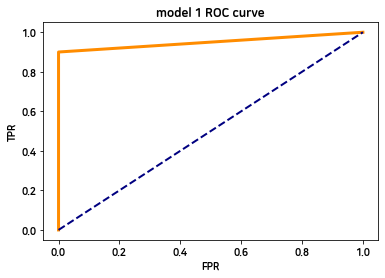

In [292]:
plt.plot(fpr, tpr,   color="darkorange", lw=3,)
plt.title('model 1 ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR');

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")